# Imports

In [1]:
# Libraries for extracting, cleaning, and manipulating data

from helpers import *
import pandas as pd
import numpy as np
import string

# For plotting graphs

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Library used to count the frequency of words 

from sklearn.feature_extraction.text import CountVectorizer

# To create the sentiment analysis model, tokenization and lemmatization

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
import nltk.data
nltk.download('vader_lexicon')
nltk.download('punkt')

# To create the Topic Model

from helpers import lyrics_to_words
import gensim
from gensim import corpora
from gensim.corpora.dictionary import Dictionary


/Users/vedantshrivastava/opt/anaconda3/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vedantshrivastava/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vedantshrivastava/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Extracting the information of the 50 most popular songs of Coldplay using function created on helpers script

access_token = 'vLPkp7ZMkcwo9wierjo2I_W_9bcUPxJcJZbZAjToQYvPeTInYQf8AEtMxtqiVY7t'
df0 = search_data('Coldplay',50,access_token)

Searching for songs by Coldplay...

Song 1: "The Scientist"
Song 2: "Viva la Vida"
Song 3: "Fix You"
Song 4: "Yellow"
Song 5: "Hymn for the Weekend"
Song 6: "A Sky Full of Stars"
Song 7: "Everglow"
Song 8: "Adventure of a Lifetime"
Song 9: "Orphans"
Song 10: "Paradise"
Song 11: "Magic"
Song 12: "Clocks"
Song 13: "Daddy"
Song 14: "Everyday Life"
Song 15: "Sparks"
Song 16: "Up&Up"
Song 17: "Trouble"
Song 18: "Arabesque"
Song 19: "Hypnotised"
Song 20: "All I Can Think About Is You"
Song 21: "Fly On"
Song 22: "Champion of the World"
Song 23: "Violet Hill"
Song 24: "Ink"
Song 25: "In My Place"
Song 26: "Church"
Song 27: "Always in My Head"
Song 28: "Midnight"
Song 29: "Shiver"
Song 30: "Strawberry Swing"
Song 31: "Trouble in Town"
Song 32: "True Love"
Song 33: "O"
Song 34: "A Rush of Blood to the Head"
Song 35: "Green Eyes"
Song 36: "Every Teardrop Is a Waterfall"
Song 37: "Don’t Panic"
Song 38: "Charlie Brown"
Song 39: "Fun"
Song 40: "Amazing Day"
Song 41: "Speed of Sound"
Song 42: "A Head

In [3]:
df0.head(10)

,artist,title,album,date,lyric
0,Coldplay,The Scientist,A Rush of Blood to the Head,2002-08-26,"[Verse 1]\nCome up to meet you, tell you I'm s..."
1,Coldplay,Viva la Vida,Viva La Vida or Death and All His Friends,2008-05-25,[Verse 1: Chris Martin]\nI used to rule the wo...
2,Coldplay,Fix You,X&Y,2005-06-06,[Verse 1: Chris Martin]\nWhen you try your bes...
3,Coldplay,Yellow,Parachutes,2000-06-26,[Verse 1: Chris Martin]\nLook at the stars\nLo...
4,Coldplay,Hymn for the Weekend,A Head Full of Dreams,2016-01-25,"[Intro: Beyoncé]\nAnd said drink from me, drin..."
5,Coldplay,A Sky Full of Stars,Ghost Stories,2014-05-02,"[Verse 1]\n'Cause you're a sky, 'cause you're ..."
6,Coldplay,Everglow,A Head Full of Dreams,2015-11-26,"[Verse 1]\nOh, they say people come, say peopl..."
7,Coldplay,Adventure of a Lifetime,A Head Full of Dreams,2015-11-06,[Intro]\n[Indecipherable]\n\n[Verse 1]\nTurn y...
8,Coldplay,Orphans,Everyday Life,2019-10-24,"[Intro: Chris Martin & Choir, Moses Martin]\nI..."
9,Coldplay,Paradise,Mylo Xyloto,2011-09-12,[Instrumental Intro]\n\n[Verse 1]\nOoh-ooh-ooh...


# Cleaning and transforming the data using functions created on helpers script

In [4]:
df = clean_lyrics(df0, 'lyric')
df = create_decades(df)

# Filter data to only use songs that have lyrics
df = df[df['lyric'].notnull()]

# Exporting data into a csv file
df.to_csv('lyrics.csv', index=False)

In [5]:
df.head(10)

,artist,title,album,decade,year,date,lyric
0,Coldplay,The Scientist,A Rush of Blood to the Head,00s,2002,2002-08-26,come up to meet you tell you i'm sorry you don...
1,Coldplay,Viva la Vida,Viva La Vida or Death and All His Friends,00s,2008,2008-05-25,chris martin i used to rule the world seas wou...
2,Coldplay,Fix You,X&Y,00s,2005,2005-06-06,chris martin when you try your best but you do...
3,Coldplay,Yellow,Parachutes,00s,2000,2000-06-26,chris martin look at the stars look how they s...
4,Coldplay,Hymn for the Weekend,A Head Full of Dreams,10s,2016,2016-01-25,beyoncé and said drink from me drink from me o...
5,Coldplay,A Sky Full of Stars,Ghost Stories,10s,2014,2014-05-02,'cause you're a sky 'cause you're a sky full o...
6,Coldplay,Everglow,A Head Full of Dreams,10s,2015,2015-11-26,oh they say people come say people go this par...
7,Coldplay,Adventure of a Lifetime,A Head Full of Dreams,10s,2015,2015-11-06,indecipherable turn your magic on umi she'd ...
8,Coldplay,Orphans,Everyday Life,10s,2019,2019-10-24,chris martin choir moses martin i want to kno...
9,Coldplay,Paradise,Mylo Xyloto,10s,2011,2011-09-12,oohoohooh oohoohooh oohoohooh oohoohooh oohooh...


In [6]:
def unique(list1): 
     # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    
    return unique_list


# Storing unique words of each lyrics song into a new column called "words"

In [7]:
# List used to store the words

words = []

# Iterate each lyric and split unique words appending the result into the words list

df = df.reset_index(drop=True)
for word in df['lyric'].tolist():
    words.append(unique(lyrics_to_words(word).split()))

# Create the new column with the information of words lists 

df['words'] = words

In [8]:
df.head()

,artist,title,album,decade,year,date,lyric,words
0,Coldplay,The Scientist,A Rush of Blood to the Head,00s,2002,2002-08-26,come up to meet you tell you i'm sorry you don...,"[come, meet, tell, im, sorry, know, lovely, fi..."
1,Coldplay,Viva la Vida,Viva La Vida or Death and All His Friends,00s,2008,2008-05-25,chris martin i used to rule the world seas wou...,"[chris, martin, used, rule, world, sea, would,..."
2,Coldplay,Fix You,X&Y,00s,2005,2005-06-06,chris martin when you try your best but you do...,"[chris, martin, try, best, succeed, get, want,..."
3,Coldplay,Yellow,Parachutes,00s,2000,2000-06-26,chris martin look at the stars look how they s...,"[chris, martin, look, star, shine, everything,..."
4,Coldplay,Hymn for the Weekend,A Head Full of Dreams,10s,2016,2016-01-25,beyoncé and said drink from me drink from me o...,"[beyoncé, said, drink, ohahohah, shoot, across..."


# Creating a new dataframe of all the words used in lyrics and its decades

In [9]:
# List used to store the information

set_words = []
set_decades = []

# Iterate each word and decade and stores them into the new lists

for i in df.index:
    for word in df['words'].iloc[i]:
        set_words.append(word)
        set_decades.append(df['decade'].iloc[i])

# Create the new data frame  with the information of words and decade lists 

words_df = pd.DataFrame({'words':set_words,'decade':set_decades})

In [10]:
# Defining our own Stopwords in case the clean data function does not remove all of them

stop_words = ["chris","martin","beyoncé"]

# Counting the frequency of each word that don't have on the stop_words lists  

cv = CountVectorizer(stop_words=stop_words)

# Creating a dataframe called data_cv to store the the number of times the word was used in a lyric based on their decades

text_cv = cv.fit_transform(words_df['words'].iloc[:])
data_cv = pd.DataFrame(text_cv.toarray(),columns=cv.get_feature_names())
data_cv['decade'] = words_df['decade']

# Creating a dataframe that sums the ocurrence frequency of each word and group the result by decade

vect_words = data_cv.groupby('decade').sum().T
vect_words = vect_words.reset_index(level=0).rename(columns ={'index':'words'})
vect_words = vect_words.rename_axis(columns='')

# Exporting the data into a csv file

vect_words.to_csv('words.csv',index=False)

# Changing the order of columns to order from the oldest to actual decade

vect_words = vect_words[['words','00s','10s']]

In [11]:
vect_words

,words,00s,10s
0,aah,1,0
1,across,2,2
2,adventure,0,1
3,age,0,1
4,ah,2,2
...,...,...,...
1171,کز,0,1
1172,که,0,1
1173,گوهرند,0,1
1174,یک,0,1


# Plotting Word Clouds

In [12]:
def plot_wordcloud(df,row,col):
    wc = WordCloud( background_color="white",colormap="Dark2",max_font_size=100,random_state=15)

    fig = plt.figure(figsize=(20,10))
    
    for index, value in enumerate(df.columns[1:]):

        top_dict = dict(zip(df['words'].tolist(),df[value].tolist()))
        wc.generate_from_frequencies(top_dict)
        plt.subplot(row,col,index+1)
        plt.imshow(wc,interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{value}",fontsize=15) 

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

def words_stats(df,main_df):
    unique_words = []
    total_words = []
    total_news = []
    years = []
    for value in df.columns[1:]:
         unique_words.append(np.count_nonzero(df[value]))
         total_words.append(sum(df[value]))
         years.append(str(value))
         total_news.append(main_df['decade'][main_df['decade']==value].count())
    
    data = pd.DataFrame({'decade':years,'unique words':unique_words,'total words':total_words,'total songs':total_news})
    data['words per songs'] = round(data['total words'] / data['total songs'],0)
    data['words per songs'] = data['words per songs'].astype('int')
    return data

def plot_freq_words(df,decade,n_words):
    
    top_words_2020 = df.sort_values([decade],ascending=False).head(n_words)

    fig = plt.figure(figsize=(15,8))
    plt.plot(top_words_2020['words'],top_words_2020[df.columns[1]])
    plt.plot(top_words_2020['words'],top_words_2020[df.columns[2]])


    plt.legend(df.columns[1:].tolist())
    plt.title(f"Most frequent words in {decade} compared with other decades",fontsize=14)
    plt.xlabel(f'Most Frequent Words of {decade}',fontsize=12)
    plt.ylabel('Frecuency',fontsize=12)
    plt.xticks(fontsize=12,rotation=20)
    plt.yticks(fontsize=12)
    plt.savefig("lineplot.png",format="png", bbox_inches='tight')
    plt.show()

In [13]:
words_stats(vect_words,df)

,decade,unique words,total words,total songs,words per songs
0,00s,549,904,19,48
1,10s,889,1621,31,52


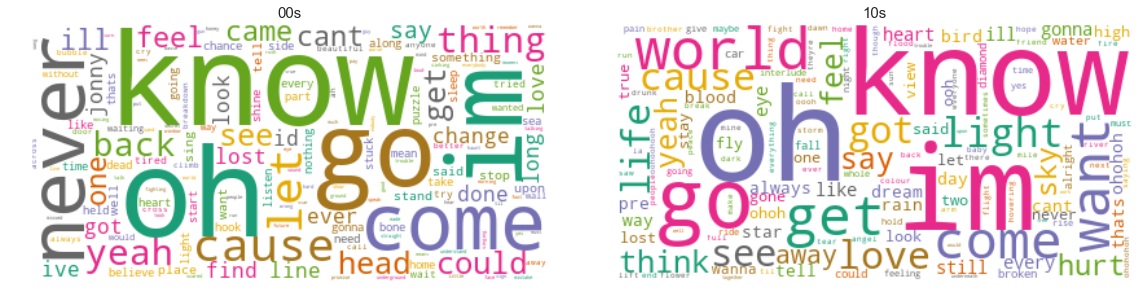

In [14]:
plot_wordcloud(vect_words,2,2)

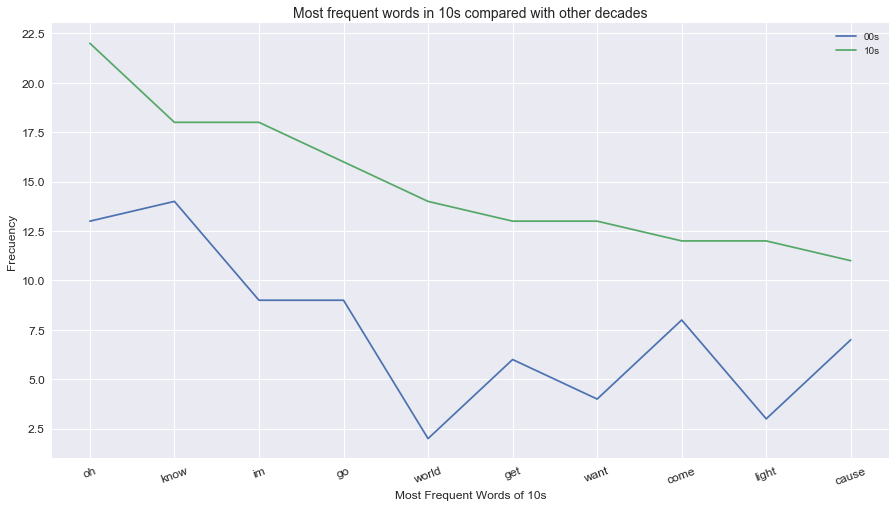

In [15]:
plot_freq_words(vect_words,'10s',10)

# Displaying most common words used per decade

In [16]:
def unique_decade_words(df,decade,n_words):
    periods = []
    unique_words = []
    top_words = df.sort_values([decade],ascending=False).head(n_words).reset_index(drop=True)

    for d in top_words.columns[1:]:
        if d != decade:
            periods.append(d)

    for i in top_words.index:
        if top_words[periods[0]].iloc[i]<top_words[decade].min():
#             if top_words[periods[1]].iloc[i]<top_words[decade].min():
#                 if top_words[periods[2]].iloc[i]<top_words[decade].min():
                    unique_words.append(top_words['words'].iloc[i])
    return unique_words

In [17]:
unique_decade_words(vect_words,'10s',20)

['world',
 'get',
 'want',
 'light',
 'cause',
 'life',
 'love',
 'see',
 'think',
 'got',
 'say',
 'yeah',
 'feel',
 'sky',
 'hurt']

# Sentiment Analysis using VADER Sentiment Intensity Model

In [18]:
# Creating lists to store the different scores for each word

negative = []
neutral = []
positive = []
compound = []

# Initializing the model

sid = SentimentIntensityAnalyzer()

# Iterating for each row of lyrics and append the scores

for i in df.index:
    scores = sid.polarity_scores(df['lyric'].iloc[i])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])

# Creating 4 columns to the main data frame  for each score 

df['negative'] = negative
df['neutral'] = neutral
df['positive'] = positive
df['compound'] = compound

In [19]:
df.head(10)

,artist,title,album,decade,year,date,lyric,words,negative,neutral,positive,compound
0,Coldplay,The Scientist,A Rush of Blood to the Head,00s,2002,2002-08-26,come up to meet you tell you i'm sorry you don...,"[come, meet, tell, im, sorry, know, lovely, fi...",0.101,0.809,0.091,0.2330
1,Coldplay,Viva la Vida,Viva La Vida or Death and All His Friends,00s,2008,2008-05-25,chris martin i used to rule the world seas wou...,"[chris, martin, used, rule, world, sea, would,...",0.037,0.941,0.022,-0.6061
2,Coldplay,Fix You,X&Y,00s,2005,2005-06-06,chris martin when you try your best but you do...,"[chris, martin, try, best, succeed, get, want,...",0.168,0.731,0.101,-0.9376
3,Coldplay,Yellow,Parachutes,00s,2000,2000-06-26,chris martin look at the stars look how they s...,"[chris, martin, look, star, shine, everything,...",0.000,0.886,0.114,0.9766
4,Coldplay,Hymn for the Weekend,A Head Full of Dreams,10s,2016,2016-01-25,beyoncé and said drink from me drink from me o...,"[beyoncé, said, drink, ohahohah, shoot, across...",0.169,0.802,0.029,-0.9925
5,Coldplay,A Sky Full of Stars,Ghost Stories,10s,2014,2014-05-02,'cause you're a sky 'cause you're a sky full o...,"[cause, sky, full, star, im, gonna, give, hear...",0.088,0.822,0.090,0.0485
6,Coldplay,Everglow,A Head Full of Dreams,10s,2015,2015-11-26,oh they say people come say people go this par...,"[oh, say, people, come, go, particular, diamon...",0.039,0.833,0.128,0.9505
7,Coldplay,Adventure of a Lifetime,A Head Full of Dreams,10s,2015,2015-11-06,indecipherable turn your magic on umi she'd ...,"[indecipherable, turn, magic, umi, shed, say, ...",0.067,0.639,0.294,0.9961
8,Coldplay,Orphans,Everyday Life,10s,2019,2019-10-24,chris martin choir moses martin i want to kno...,"[chris, martin, choir, moses, want, know, go, ...",0.033,0.821,0.146,0.9854
9,Coldplay,Paradise,Mylo Xyloto,10s,2011,2011-09-12,oohoohooh oohoohooh oohoohooh oohoohooh oohooh...,"[oohoohooh, girl, expected, world, flew, away,...",0.029,0.937,0.035,-0.4116


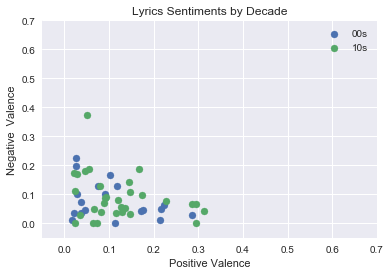

In [20]:
for name, group in df.groupby('decade'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend(fontsize=10)

plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])

plt.title("Lyrics Sentiments by Decade")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.show()

In [21]:
means_df = df.groupby(['decade']).mean()
means_df

,year,negative,neutral,positive,compound
decade,,,,,
00s,2003.210526,0.078632,0.815158,0.106263,0.049763
10s,2015.806452,0.089645,0.789839,0.120452,0.289100


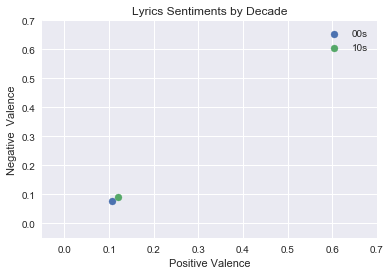

In [22]:
for name, group in means_df.groupby('decade'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend()

plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])
plt.title("Lyrics Sentiments by Decade")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')

plt.show()


# Topic Modeling

In [23]:
df_tm = pd.read_csv('lyrics.csv')

In [24]:
df_tm.head()

,artist,title,album,decade,year,date,lyric
0,Coldplay,The Scientist,A Rush of Blood to the Head,00s,2002,2002-08-26,come up to meet you tell you i'm sorry you don...
1,Coldplay,Viva la Vida,Viva La Vida or Death and All His Friends,00s,2008,2008-05-25,chris martin i used to rule the world seas wou...
2,Coldplay,Fix You,X&Y,00s,2005,2005-06-06,chris martin when you try your best but you do...
3,Coldplay,Yellow,Parachutes,00s,2000,2000-06-26,chris martin look at the stars look how they s...
4,Coldplay,Hymn for the Weekend,A Head Full of Dreams,10s,2016,2016-01-25,beyoncé and said drink from me drink from me o...


In [25]:
def unique(list1): 
     
        # Initializing a null list 
    
    unique_list = [] 
      
    # Traverse for all elements 
    
    for x in list1: 
        
        # Checking if it exists in unique_list or not 
        
        if x not in unique_list: 
            unique_list.append(x) 
    
    return unique_list

# Storing unique words of each lyrics song into a new column called words

In [26]:
# List used to store the words

words = []

# Iterating trought each lyric and split unique words appending the result into the words list

df_tm = df_tm.reset_index(drop=True)
for word in df_tm['lyric'].tolist():
    words.append(unique(lyrics_to_words(word).split()))

# Creating the new column with the information of words lists 

df_tm['words'] = words

In [27]:
words = df_tm['words'].tolist()
dictionary = corpora.Dictionary(words)
corpus = [dictionary.doc2bow(text) for text in words]
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [28]:
coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=words, dictionary=dictionary, coherence='c_v')

print(f"Coherence Score:{coherence_model_lda.get_coherence()}")
print(f"Perplexity Score:{lda_model.log_perplexity(corpus)}")

Coherence Score:0.5878667519806824
Perplexity Score:-7.638011744505537


In [29]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = gensim.models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


In [30]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=words, start=10, limit=100, step=5)

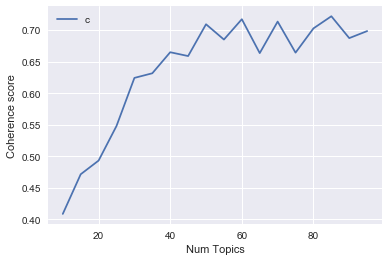

Num Topics = 10  has Coherence Value of 0.4087
Num Topics = 15  has Coherence Value of 0.4715
Num Topics = 20  has Coherence Value of 0.4932
Num Topics = 25  has Coherence Value of 0.5481
Num Topics = 30  has Coherence Value of 0.6243
Num Topics = 35  has Coherence Value of 0.6316
Num Topics = 40  has Coherence Value of 0.665
Num Topics = 45  has Coherence Value of 0.6589
Num Topics = 50  has Coherence Value of 0.7093
Num Topics = 55  has Coherence Value of 0.6851
Num Topics = 60  has Coherence Value of 0.7173
Num Topics = 65  has Coherence Value of 0.6636
Num Topics = 70  has Coherence Value of 0.7135
Num Topics = 75  has Coherence Value of 0.6643
Num Topics = 80  has Coherence Value of 0.7027
Num Topics = 85  has Coherence Value of 0.722
Num Topics = 90  has Coherence Value of 0.6873
Num Topics = 95  has Coherence Value of 0.6985


In [31]:
limit=100; start=10; step=5
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [32]:
optimal_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=55, id2word=dictionary)

In [36]:
def format_topics_sentences(ldamodel, corpus, texts):
    
    # Init output
    
    sent_topics_df = pd.DataFrame()

    # Getting main topic in each document
    
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        
        # Getting the Dominant topic, Perc Contribution and Keywords for each document
        
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Adding original text to the end of the output
    
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=df['lyric'])

# Format

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show

df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.9818,"im, heart, go, oh, apart, gonna, dark, ever, o...",come up to meet you tell you i'm sorry you don...
1,1,14.0,0.9904,"head, oh, word, window, sing, want, world, kno...",chris martin i used to rule the world seas wou...
2,2,23.0,0.9791,"know, chris, jonny, bone, home, martin, lose, ...",chris martin when you try your best but you do...
3,3,7.0,0.9742,"oh, yeah, got, cause, skin, turn, everything, ...",chris martin look at the stars look how they s...
4,4,45.0,0.5431,"come, love, martin, blood, chris, oh, think, r...",beyoncé and said drink from me drink from me o...
5,5,1.0,0.9702,"im, heart, go, oh, apart, gonna, dark, ever, o...",'cause you're a sky 'cause you're a sky full o...
6,6,37.0,0.9872,"water, short, ran, oh, falling, see, wherever,...",oh they say people come say people go this par...
7,7,7.0,0.9815,"oh, yeah, got, cause, skin, turn, everything, ...",indecipherable turn your magic on umi she'd ...
8,8,11.0,0.9864,"almond, boom, silver, bomb, moses, back, feel,...",chris martin choir moses martin i want to kno...
9,9,52.0,0.9811,"im, get, oh, got, yes, every, disappear, cours...",oohoohooh oohoohooh oohoohooh oohoohooh oohooh...


# Grouping Top 5 Sentences under each topic

In [37]:
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9872,"im, oh, get, want, ill, tell, hurt, every, wat...",i turn the music up i got my records on i shut...
1,1.0,0.9818,"im, heart, go, oh, apart, gonna, dark, ever, o...",come up to meet you tell you i'm sorry you don...
2,2.0,0.9766,"think, know, world, love, bird, thats, order, ...",one two three fish fell out of water bird st...
3,3.0,0.9860,"know, see, call, say, cry, without, movement, ...",he said i'm gonna buy this place and burn it d...
4,5.0,0.9897,"taking, nile, referee, sail, wide, say, ship, ...",'otuto nke chukwu' gi nwa nke chukwu gini ka i...
5,6.0,0.9748,"go, come, upon, without, mind, could, came, ho...",honey you are a rock upon which i stand and i ...
6,7.0,0.9815,"oh, yeah, got, cause, skin, turn, everything, ...",indecipherable turn your magic on umi she'd ...
7,9.0,0.9693,"along, eye, tell, second, would, mine, ive, co...",for a second i was in control i had it once i ...
8,10.0,0.9847,"im, know, time, dead, get, cut, way, back, com...",it was a long and dark december from the rooft...
9,11.0,0.9864,"almond, boom, silver, bomb, moses, back, feel,...",chris martin choir moses martin i want to kno...
